In [1]:
# Lab 9 XOR
import torch

In [2]:
device = 'cuda' if torch.cuda.is_available() else 'cpu'

# for reproducibility
torch.manual_seed(777)
if device == 'cuda':
    torch.cuda.manual_seed_all(777)

multilayer perceptron
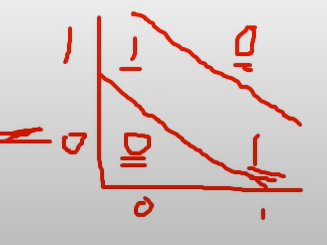

Backpropagation을 통해서 multilayer perceptron 을 학습할 수 있게되었다

In [3]:
X = torch.FloatTensor([[0, 0], [0, 1], [1, 0], [1, 1]]).to(device)
Y = torch.FloatTensor([[0], [1], [1], [0]]).to(device)

In [11]:
#nn Layers
learning_rate = 0.1

w1 = torch.Tensor(2,2).to(device)
b1 = torch.Tensor(2).to(device)
w2 = torch.Tensor(2,1).to(device)
b2 = torch.Tensor(1).to(device)

def sigmoid(x):
  return 1.0 / (1.0 + torch.exp(-x))

def sigmoid_prime(x): #sigmoid 미분
  return sigmoid(x)*(1-sigmoid(x))

for step in range(10001):
  #forward
  l1 = torch.add(torch.matmul(X,w1), b1)
  a1 = sigmoid(l1)
  l2 = torch.add(torch.matmul(a1, w2), b2)
  Y_pred = sigmoid(l2)
  cost = -torch.mean(Y*torch.log(Y_pred) + (1-Y)*torch.log(1-Y_pred))

  #backward
  d_Y_pred = (Y_pred - Y) / (Y_pred * (1.0 - Y_pred) + 1e-7)
  d_l2 = d_Y_pred * sigmoid_prime(l2)
  d_b2 = d_l2
  d_w2 = torch.matmul(torch.transpose(a1,0,1), d_b2)

  d_a1 = torch.matmul(d_b2, torch.transpose(w2, 0, 1))
  d_l1 = d_a1 * sigmoid_prime(l1)
  d_b1 = d_l1
  d_w1 = torch.matmul(torch.transpose(X,0,1), d_b1)

  #weight update
  w1 = w1 - learning_rate * d_w1
  b1 = b1 - learning_rate * torch.mean(d_b1,0)
  w2 = w2 - learning_rate * d_w2
  b2 = b2 - learning_rate * torch.mean(d_b2, 0)

  if step % 100 == 0:
    print(step, cost.item())

0 0.6931471824645996
100 0.6931471824645996
200 0.6931471824645996
300 0.6931471824645996
400 0.6931471824645996
500 0.6931471824645996
600 0.6931471824645996
700 0.6931471824645996
800 0.6931471824645996
900 0.6931471824645996
1000 0.6931471824645996
1100 0.6931471824645996
1200 0.6931471824645996
1300 0.6931471824645996
1400 0.6931471824645996
1500 0.6931471824645996
1600 0.6931471824645996
1700 0.6931471824645996
1800 0.6931471824645996
1900 0.6931471824645996
2000 0.6931471824645996
2100 0.6931471824645996
2200 0.6931471824645996
2300 0.6931471824645996
2400 0.6931471824645996
2500 0.6931471824645996
2600 0.6931471824645996
2700 0.6931471824645996
2800 0.6931471824645996
2900 0.6931471824645996
3000 0.6931471824645996
3100 0.6931471824645996
3200 0.6931471824645996
3300 0.6931471824645996
3400 0.6931471824645996
3500 0.6931471824645996
3600 0.6931471824645996
3700 0.6931471824645996
3800 0.6931471824645996
3900 0.6931471824645996
4000 0.6931471824645996
4100 0.6931471824645996
4200

In [12]:
# nn layers
#multilayer perceptron
linear1 = torch.nn.Linear(2, 2, bias=True)
linear2 = torch.nn.Linear(2, 1, bias=True)
sigmoid = torch.nn.Sigmoid()

In [16]:
# nn layers
#multilayer perceptron
linear1 = torch.nn.Linear(2, 10, bias=True)
linear2 = torch.nn.Linear(10, 10, bias=True)
linear3 = torch.nn.Linear(10, 10, bias=True)
linear4 = torch.nn.Linear(10, 1, bias=True)
sigmoid = torch.nn.Sigmoid()

In [13]:
# model
model = torch.nn.Sequential(linear1, sigmoid, linear2, sigmoid).to(device)

In [17]:
model = torch.nn.Sequential(linear1, sigmoid, linear2, linear3, linear4, sigmoid).to(device)

In [18]:
# define cost/loss & optimizer
criterion = torch.nn.BCELoss().to(device)
optimizer = torch.optim.SGD(model.parameters(), lr=1)  # modified learning rate from 0.1 to 1

In [19]:
for step in range(10001):
    optimizer.zero_grad()
    hypothesis = model(X)

    # cost/loss function
    cost = criterion(hypothesis, Y)
    cost.backward()
    optimizer.step()

    if step % 100 == 0:
        print(step, cost.item())

0 0.7102116346359253
100 0.6922491192817688
200 0.68742835521698
300 0.6911934018135071
400 31.777183532714844
500 31.777183532714844
600 31.777183532714844
700 31.777183532714844
800 31.777183532714844
900 31.777183532714844
1000 31.777183532714844
1100 31.777183532714844
1200 31.777183532714844
1300 31.777183532714844
1400 31.777183532714844
1500 31.777183532714844
1600 31.777183532714844
1700 31.777183532714844
1800 31.777183532714844
1900 31.777183532714844
2000 31.777183532714844
2100 31.777183532714844
2200 31.777183532714844
2300 31.777183532714844
2400 31.777183532714844
2500 31.777183532714844
2600 31.777183532714844
2700 31.777183532714844
2800 31.777183532714844
2900 31.777183532714844
3000 31.777183532714844
3100 31.777183532714844
3200 31.777183532714844
3300 31.777183532714844
3400 31.777183532714844
3500 31.777183532714844
3600 31.777183532714844
3700 31.777183532714844
3800 31.777183532714844
3900 31.777183532714844
4000 31.777183532714844
4100 31.777183532714844
4200 3

In [ ]:
 # Accuracy computation
# True if hypothesis>0.5 else False
with torch.no_grad():
    hypothesis = model(X)
    predicted = (hypothesis > 0.5).float()
    accuracy = (predicted == Y).float().mean()
    print('\nHypothesis: ', hypothesis.detach().cpu().numpy(), '\nCorrect: ', predicted.detach().cpu().numpy(), '\nAccuracy: ', accuracy.item())


Hypothesis:  [[0.00106364]
 [0.99889404]
 [0.99889404]
 [0.00165861]] 
Correct:  [[0.]
 [1.]
 [1.]
 [0.]] 
Accuracy:  1.0
